<a href="https://colab.research.google.com/github/ash-01xor/Exploratory-Data-Analysis/blob/main/in_depth_analysis_of_disney_content.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **If this EDA helps you , make sure to upvote!**

### **Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("../input/disney-movies-and-tv-shows/disney_plus_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...
1449,s1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,United States,"April 1, 2020",2012,TV-G,2 min,"Action-Adventure, Animals & Nature, Animation",View one of Sparky's favorite home movies.


In [ ]:
print("The columns in the given dataset:\n",df.columns)
print("The total number of columns in the given dataset:",df.columns.value_counts().sum())

The columns in the given dataset:
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
The total number of columns in the given dataset: 12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


### **Exploratory Data Analysis**

**The datatypes of the columns present in the dataset**

In [ ]:
df.dtypes.value_counts()

object    11
int64      1
dtype: int64

In [ ]:
df.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


## **Null values present in the dataset:**

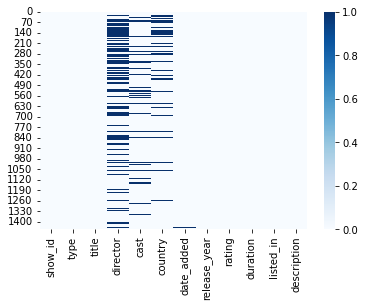

In [ ]:
sns.heatmap(df.isnull(),cmap='Blues')
plt.show()

In [ ]:
df.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
print("The percentage of null values in the columns consisting of null values:\n")
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("null rate of {} column: {}%".format(i,round(null_rate,3)))

The percentage of null values in the columns consisting of null values:

null rate of director column: 32.621%
null rate of cast column: 13.103%
null rate of country column: 15.103%
null rate of date_added column: 0.207%
null rate of rating column: 0.207%


### **Univariate Variable Analysis:**

- Since **Show_id** columns isnt going to give any valuble insight for our analysis we might consider removing the column.

In [ ]:
df.drop(['show_id'],axis=1)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...
1445,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


### **Type:**

In [ ]:
df['type'].value_counts()

Movie      1052
TV Show     398
Name: type, dtype: int64

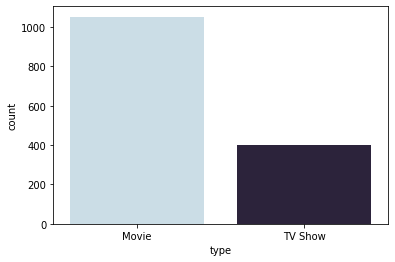

In [ ]:
sns.countplot(x='type',data=df,palette="ch:s=.25,rot=-.25")
plt.show()

-  We can infer that the number of movies are greater than the number of tv shows in Disney platform

### **Rating:**

#### **The ratings present are in the platform are:**

In [ ]:
disney_rating=df['rating'].dropna().unique()
print(disney_rating)

['TV-G' 'PG' 'TV-PG' 'PG-13' 'TV-14' 'G' 'TV-Y7' 'TV-Y' 'TV-Y7-FV']


- **TV-G** = Most parents will find this program suitable for all ages.
- **PG** = Parental guidance suggested – Some material may not be suitable for children.
- **TV-PG** = This program contains material that parents may find unsuitable for younger children .
- **PG-13** = Parents strongly cautioned – Some material may be inappropriate for children under 13.
- **TV-14** = This program contains material that most parents would find unsuitable for children under 14 years of age .
- **G** = Appropriate for people of all ages .
- **TV-Y7** = This program is designed for children age 7 and above.
- **TV-Y** = This program is designed to be appropriate for all children.
- **TV-Y7-FV** = indicating programs directed to older children and containing more intense or combative fantasy violence.

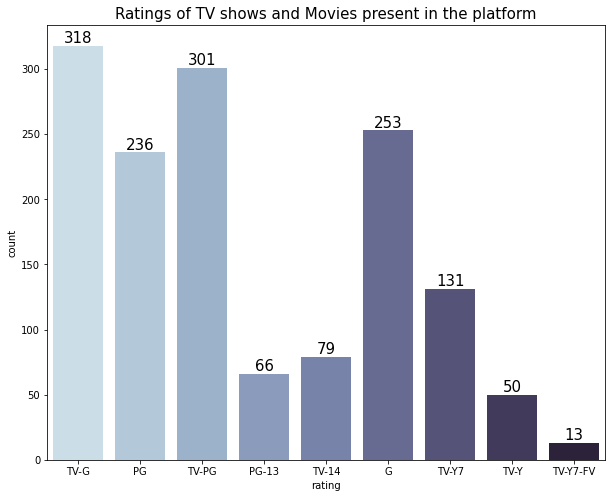

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Ratings of TV shows and Movies present in the platform",fontsize=15)
c1=sns.countplot(x='rating',data=df,palette="ch:s=.25,rot=-.25")
c1.bar_label(c1.containers[0],size = 15)
plt.show()

- From the above plot we can infer that 
  - Most of the shows and movies present are suitable for all ages.

### **Release-year:**

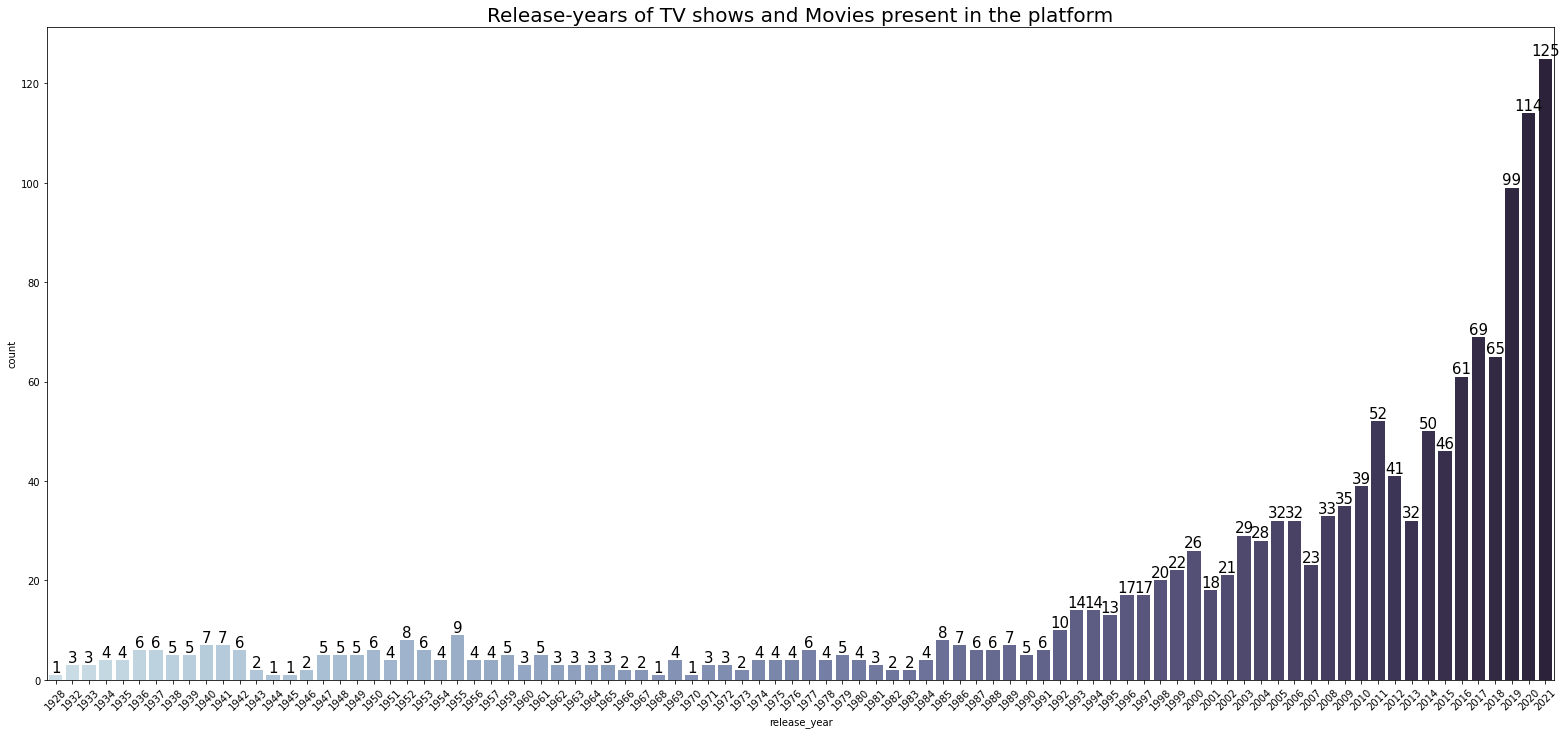

In [ ]:
plt.figure(figsize=(27, 12))
plt.title("Release-years of TV shows and Movies present in the platform",fontsize=20)
c1=sns.countplot(x='release_year',data=df,palette="ch:s=.25,rot=-.25")
c1.bar_label(c1.containers[0],size = 15)
plt.xticks(rotation=45)
plt.show()

- **From the given plot we found out that there has been a surge of content present in Disney over the past decade(2010-2020)**
- **The amount of content from (1928-1990) is really low in the platform.**

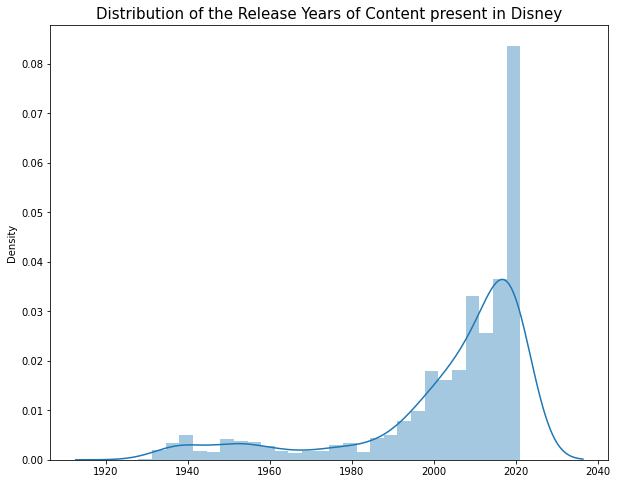

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(x=df["release_year"])
plt.title("Distribution of the Release Years of Content present in Disney", size=15)
plt.show()

In [ ]:
df["date_added"] = pd.to_datetime(df["date_added"])
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [ ]:
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T
data_sub = data_sub.reset_index()

In [ ]:
print(data_sub)

type month_name_added  TV Show  Movie
0               April       25     86
1              August       21     50
2            December       13     52
3            February       18     44
4             January       23     61
5                July       35     85
6                June       22     52
7               March       10     24
8                 May       30     62
9            November      145    809
10            October       22     63
11          September       31     59


- **Majority of the moviess were added leading to the december holiday season.**

### **Genre of Content:**

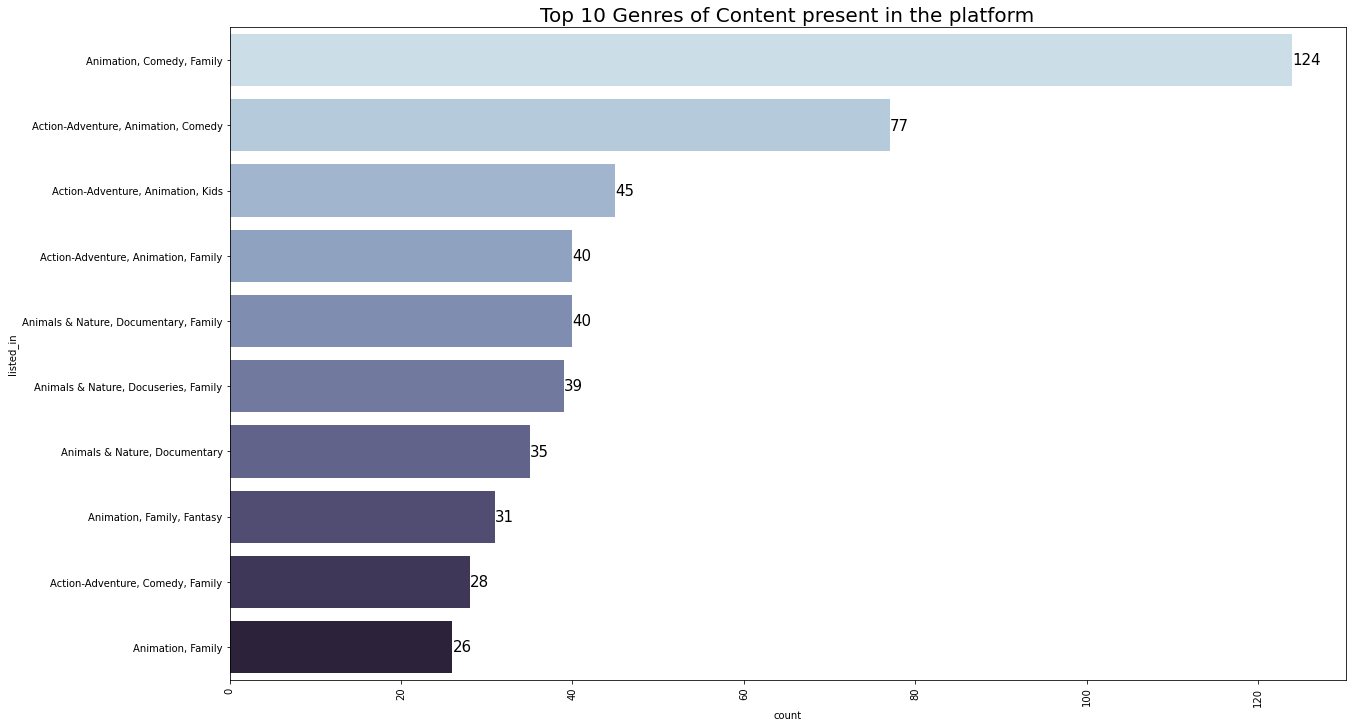

In [ ]:
plt.figure(figsize=(20, 12))
plt.title("Top 10 Genres of Content present in the platform",fontsize=20)
c1=sns.countplot(y='listed_in',data=df,palette="ch:s=.25,rot=-.25",order=df.listed_in.value_counts().iloc[:10].index)
c1.bar_label(c1.containers[0],size = 15)
plt.xticks(rotation=90)
plt.show()

- **The genre present the most in Disney seems to be "Animation,Comedy and Family"**
- **We are also able to infer from the plots that most of the content have been classified into a combination of genre's not boxed into one particular kind of genre**

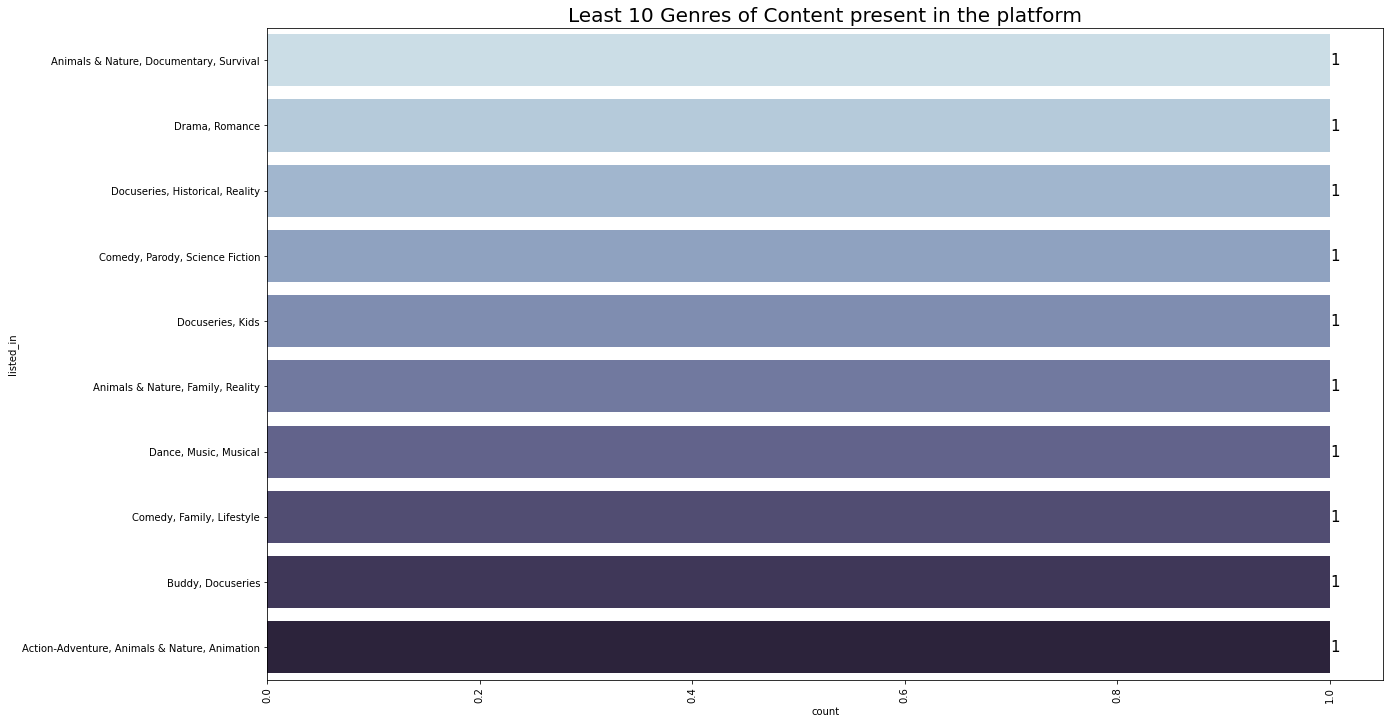

In [ ]:
plt.figure(figsize=(20, 12))
plt.title("Least 10 Genres of Content present in the platform",fontsize=20)
c1=sns.countplot(y='listed_in',data=df,palette="ch:s=.25,rot=-.25",order=df.listed_in.value_counts().iloc[-10:].index)
c1.bar_label(c1.containers[0],size = 15)
plt.xticks(rotation=90)
plt.show()

#### **We would like to find the correlation between various movie genres**

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']:
        Types += i
    Types = set(Types)
    print("There are {} types in the Disney Plus {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15,15))
    pl = sns.heatmap(corr, mask=mask, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    plt.show()

There are 36 types in the Disney Plus Movie Dataset


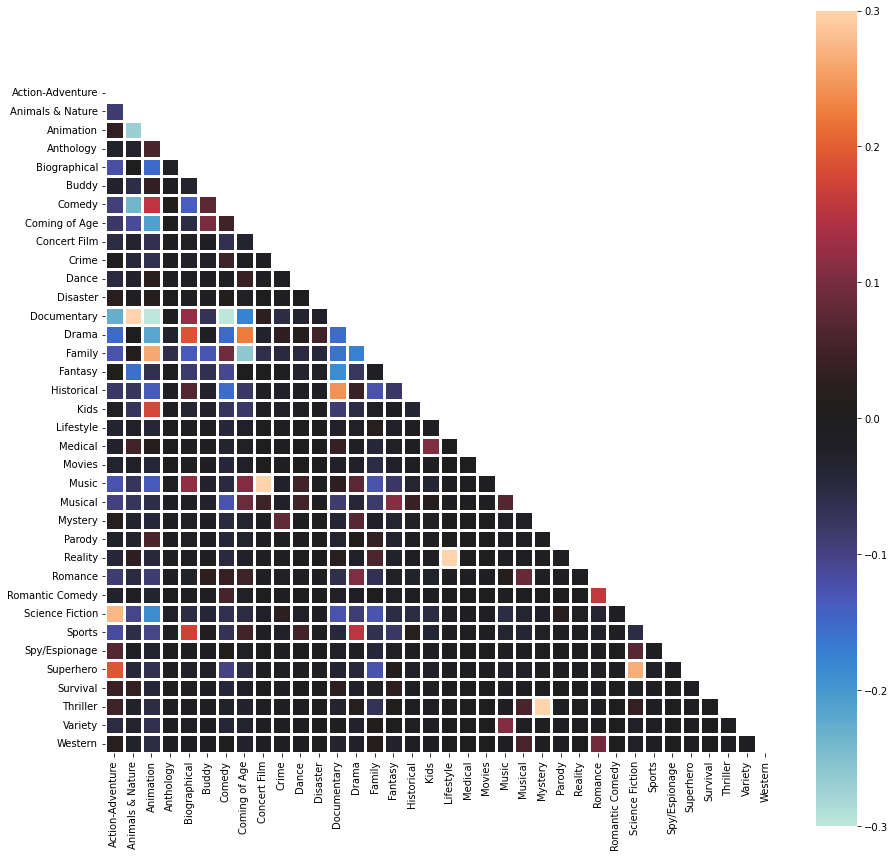

In [ ]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]
genre_heatmap(df_movies, 'Movie')

From the given plot we can infer that:
- **Most of the documentary films are mostly about Animals and Nature.**
- **Superhero films are highly associated with Science Fiction.**
- **Science fiction and Action-Adventure films are closely related.**

### **Directors:**

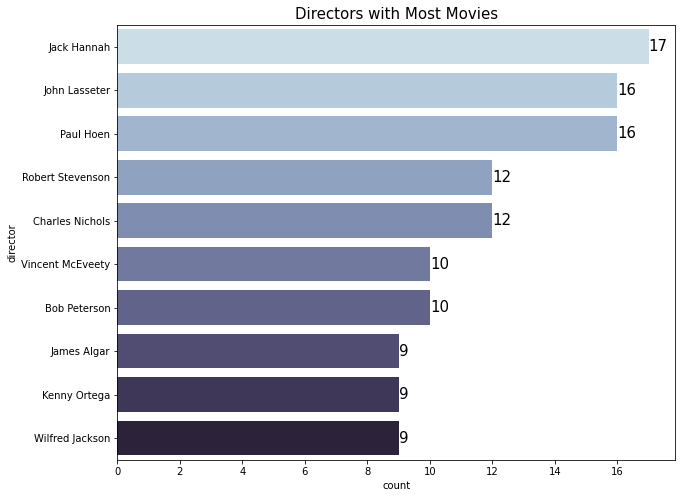

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Directors with Most Movies", size=15)
c1=sns.countplot(y='director',data=df,palette="ch:s=.25,rot=-.25",order=df.director.value_counts().iloc[:10].index)
c1.bar_label(c1.containers[0],size = 15)
plt.show()

- **Jack Hannah famous for his animation films is the director with 17 movies in the platform followed by John Lasseter and Paul Hoen with 16 respectively.**

### **Cast:**

In [ ]:
def parse_column(column):
    column = column.str.split(',')

    series = list()
    for index, value in column.items():
        series.append(value)

    words = list()
    counts = dict()
    for obj in series:
        for word in obj:
            word = str(word).lstrip()
            words.append(word)

    for word in words:
        if word not in counts:
            counts[word] = 1
        else:
            counts[word] += 1
    counts_items = counts.items()
    data_list = list(counts_items)
    new_df = pd.DataFrame(data_list)
    new_df = new_df.rename({0: column.name, 1: 'total'}, axis=1)
    new_df = new_df.sort_values(by=['total'], ascending=False)
    new_df = new_df.reset_index(drop=True)
    return new_df

In [ ]:
mask = df['cast'].notnull()
disney_castdf = df['cast'][mask]
disney_cast = parse_column(disney_castdf)
disney_cast[:30]

,cast,total
0,Jim Cummings,33
1,Walt Disney,20
2,Bill Farmer,18
3,Larry the Cable Guy,17
4,Tress MacNeille,16
5,Corey Burton,16
6,Keith Ferguson,16
7,Pinto Colvig,15
8,Bob Peterson,15
9,Jeff Bennett,15


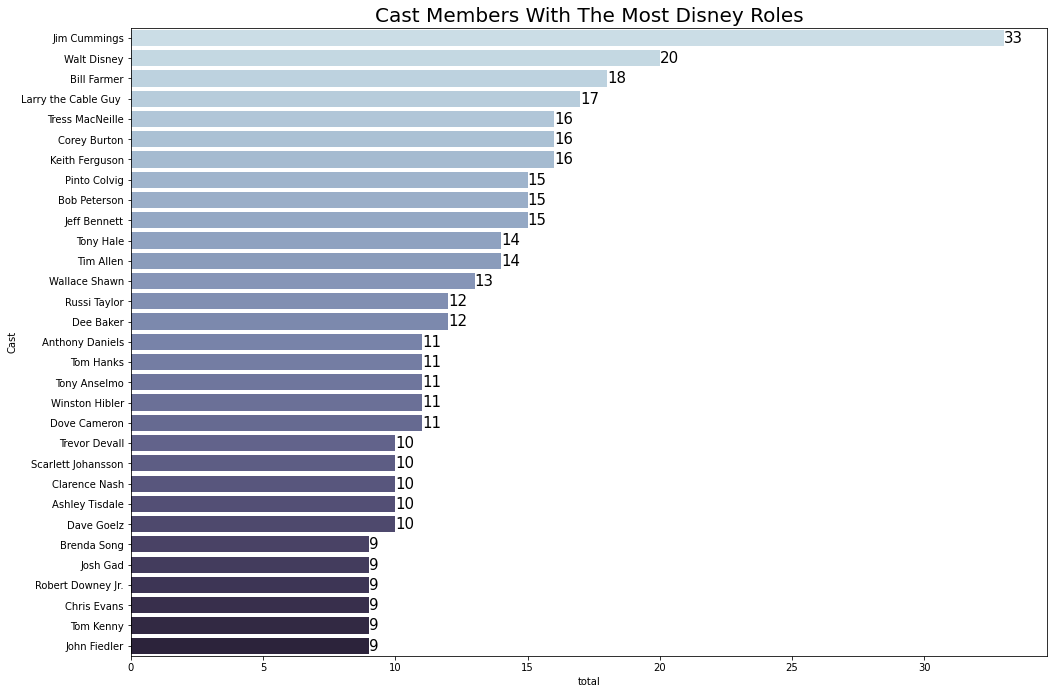

In [ ]:
mask = df['cast'].notnull()
disney_castdf = df['cast'][mask]
disney_cast = parse_column(disney_castdf)

fig, axes = plt.subplots(1, 1, figsize=(15, 10))
axes.set_title('Cast Members With The Most Disney Roles',fontsize=20)
c1 = sns.barplot(x='total', y='cast', data=disney_cast[:31], ax=axes, palette="ch:s=.25,rot=-.25")
c1.set(ylabel='Cast')
c1.bar_label(c1.containers[0],size = 15)

plt.tight_layout(pad=2);

The  top 5 actors with the most disney roles are:
- **Jim Cummings**
- **Walt Disney**
- **Bill Farmer**
- **Larry the cable guy**
- **Tress Macnielle**

### **Duration:**

In [ ]:
df_tv['season'] = df.apply(lambda x : x['duration'].split(" ")[0] if "min" not in x['duration'] else "0", axis = 1)
df_movies['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "min" in x['duration'] else "0", axis = 1)

In [ ]:
df_movies["duration"] = df_movies["duration"].astype("int64")
df_tv["season"] = df_tv["season"].astype("int64")

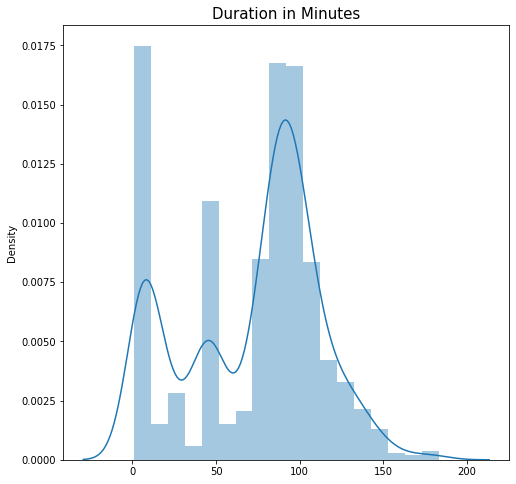

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(x=df_movies[df_movies["duration"]>0]["duration"])
plt.title("Duration in Minutes", size=15)
plt.show()

## **Dealing with missing data:**

In [ ]:
df.isnull().sum()

show_id               0
type                  0
title                 0
director            473
cast                190
country             219
date_added            3
release_year          0
rating                3
duration              0
listed_in             0
description           0
month_added           3
month_name_added      3
year_added            3
dtype: int64

In [ ]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)
df.drop_duplicates(inplace= True)
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
month_added         0
month_name_added    0
year_added          0
dtype: int64

### **Titles , Directors and Descriptions:**

In [ ]:
def crt_wordcloud(col):
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud,STOPWORDS
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    for val in df.description: 
        val = str(val) 
        tokens = val.split() 

    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 

    for words in tokens: 
        comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 400, height = 400,
                background_color ='#00A8E1', 
                stopwords = stopwords, 
                min_font_size = 8).generate(comment_words) 


    text = col.values
    wordcloud = WordCloud().generate(str(text))

    plt.figure(figsize = (8, 8), facecolor = '#232F3E') 
    plt.imshow(wordcloud)
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

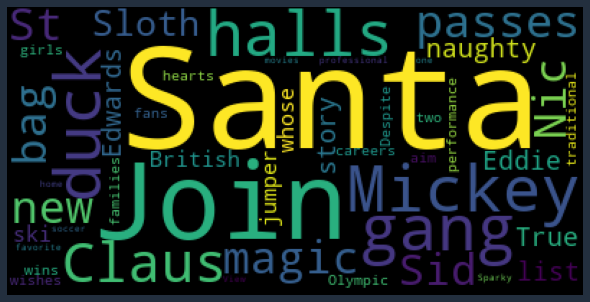

In [ ]:
crt_wordcloud(df['description'])

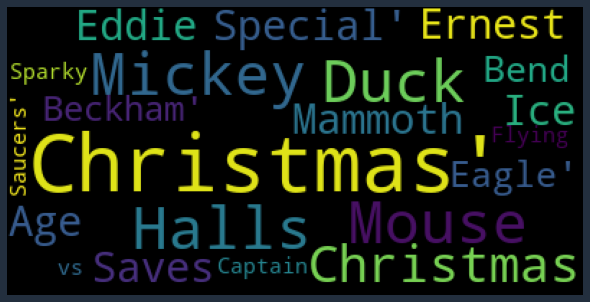

In [ ]:
crt_wordcloud(df.title)

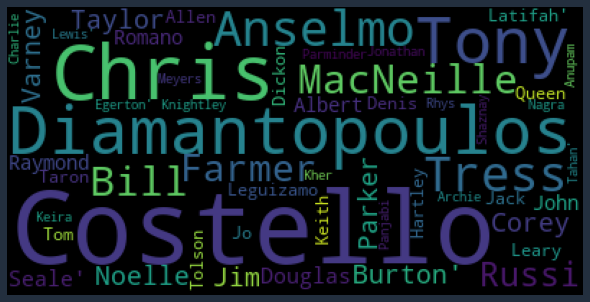

In [ ]:
crt_wordcloud(df.cast)

## **Conclusion:**

### **From the above analysis we can infer the following:**
   -  The number of **movies are greater** than the number of tv-shows in the platform.
   -  Most of the content present in the platform is **suitable for all ages**.
   -  There is a **dearth of content** for the timeline(**before 1990's**) in the platform.
   -  Majority of the movies released in the platform are in the month **November** leading to the December Holiday season.
   -  Most of content present in the platfrom is boxed into **Animation,Comedy** genres
   -  The average duration for the films are 100mins.

#### **Once again make sure you upvote if you find this useful! :)**